# Prediction using Unsupervised ML

Name Imran Riaz Chohan

## From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\chohan\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\chohan\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
#Import Data From Directory
Data=pd.read_csv("/Users/chohan/Desktop/InternShip(TSF)/Iris.csv")

# Exploratory Data Analysis

In [3]:
Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
Data.isna()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [13]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
Data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [16]:
Data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [17]:
Data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [21]:
np.shape(Data)

(150, 6)

# Data Visualization

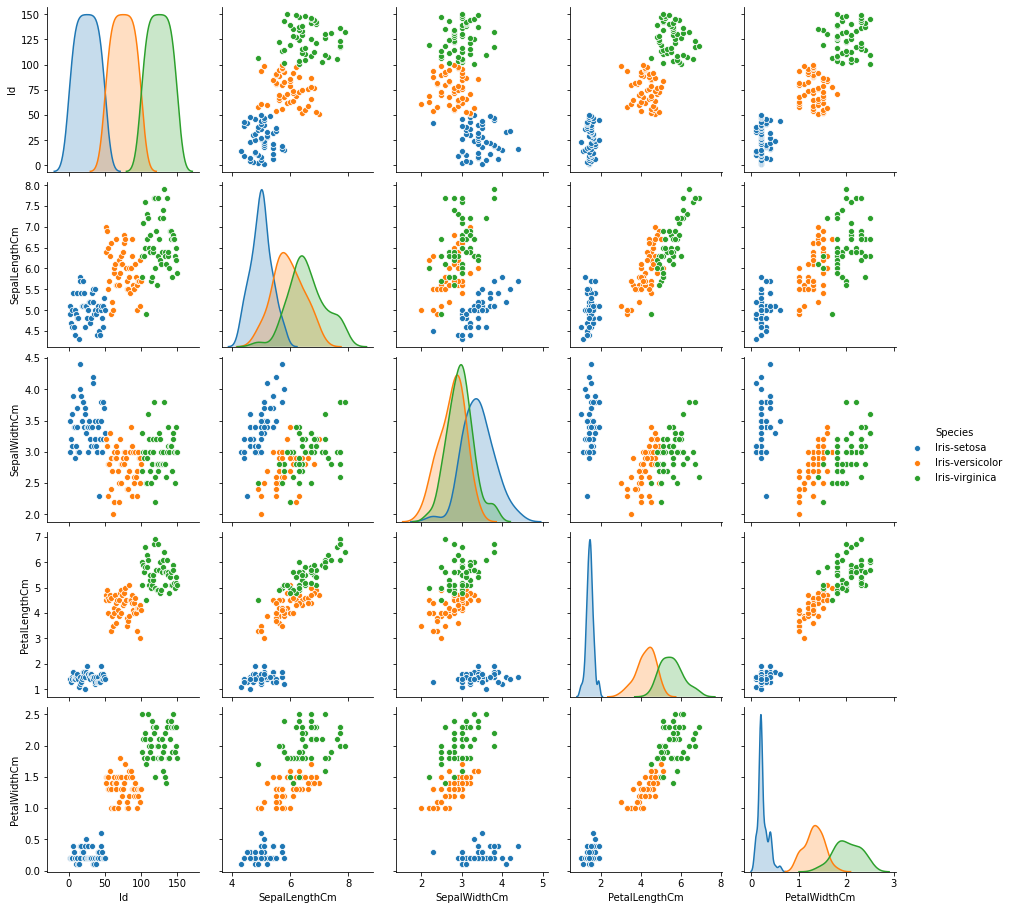

In [44]:
sns.pairplot(Data,hue='Species')
plt.show()

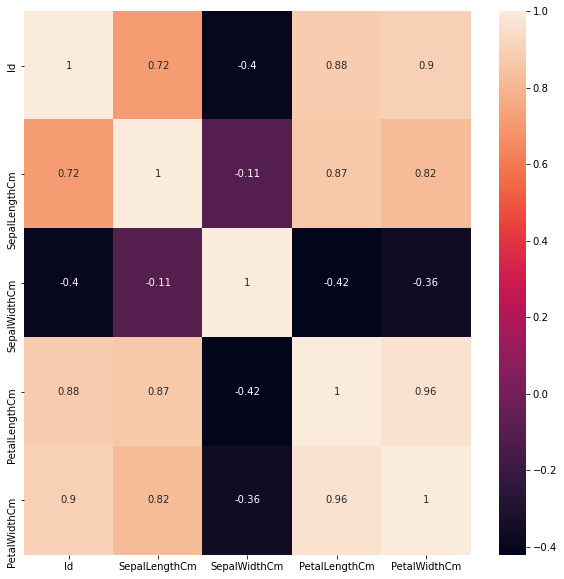

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(Data.corr(),annot=True)
plt.show()

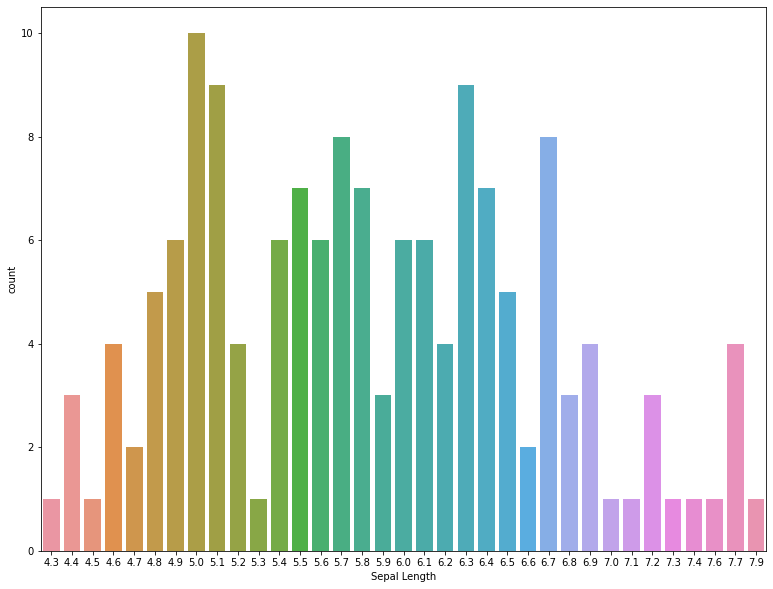

In [47]:
plt.figure(figsize=(13,10))
sns.countplot(Data["SepalLengthCm"])
plt.xlabel("Sepal Length")
plt.show()

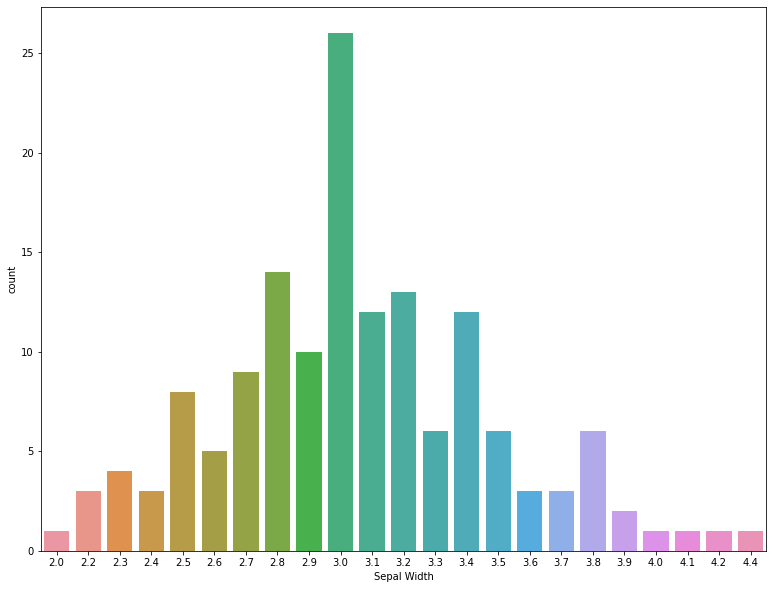

In [48]:
plt.figure(figsize=(13,10))
sns.countplot(Data["SepalWidthCm"])
plt.xlabel("Sepal Width")
plt.show()

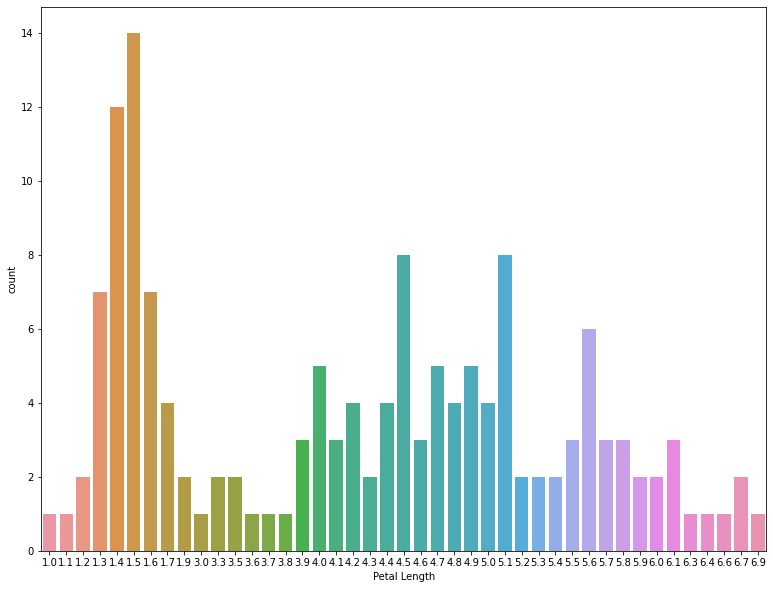

In [49]:
plt.figure(figsize=(13,10))
sns.countplot(Data["PetalLengthCm"])
plt.xlabel("Petal Length")
plt.show()

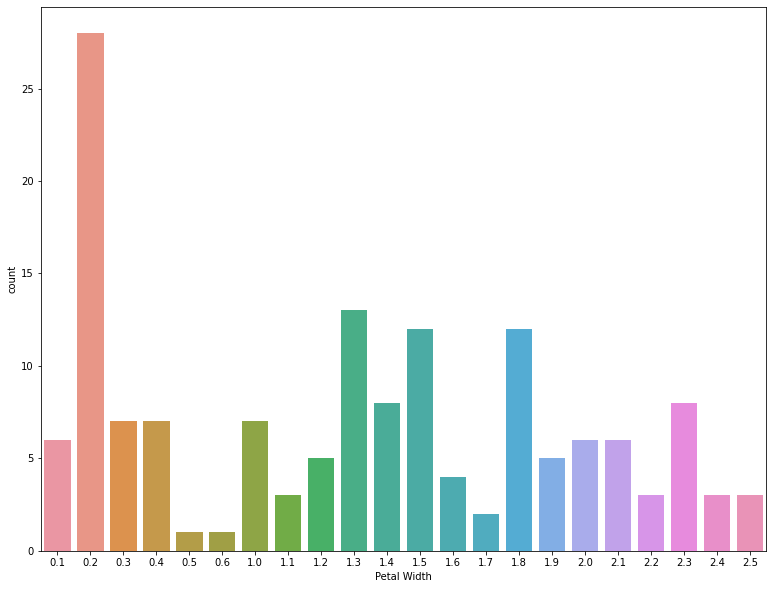

In [50]:
plt.figure(figsize=(13,10))
sns.countplot(Data["PetalWidthCm"])
plt.xlabel("Petal Width")
plt.show()

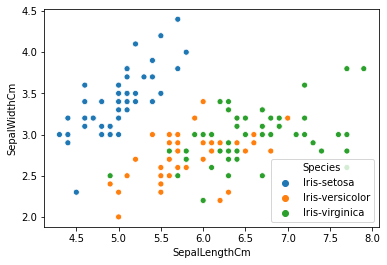

In [53]:
sns.scatterplot(x=Data["SepalLengthCm"],y=Data["SepalWidthCm"],hue=Data["Species"])

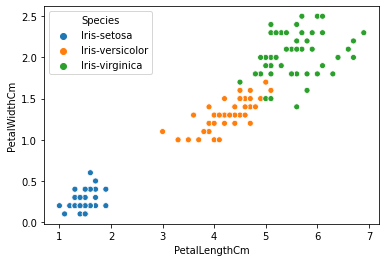

In [54]:
sns.scatterplot(x=Data["PetalLengthCm"],y=Data["PetalWidthCm"],hue=Data["Species"])

In [56]:
X=Data.iloc[:,[0,1,2,3]].values

In [57]:
#ReScale Data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scale_data=sc.fit_transform(X)
scale_data.shape

(150, 4)

In [60]:
#Check the Elbow 
wcss=[]
for i in range(1,11):
    kmeans_clusters=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans_clusters.fit(scale_data)
    wcss.append(kmeans_clusters.inertia_)

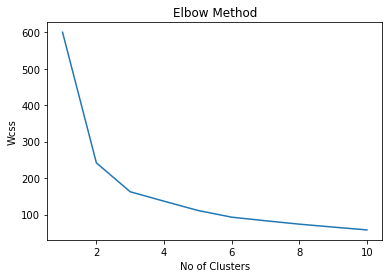

In [61]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("Wcss")
plt.show()

In [63]:
#Kmean_Clustering
kmeans_clusters=KMeans(n_clusters=3,init='k-means++',max_iter=50,random_state=100)
kmeans_clusters.fit(scale_data)

KMeans(max_iter=50, n_clusters=3, random_state=100)

In [64]:
kmeans_clusters.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [65]:
new_data=Data.copy()

In [67]:
new_data["Labels"]=kmeans_clusters.labels_

In [70]:
new_data.Labels.value_counts()

2    53
1    49
0    48
Name: Labels, dtype: int64

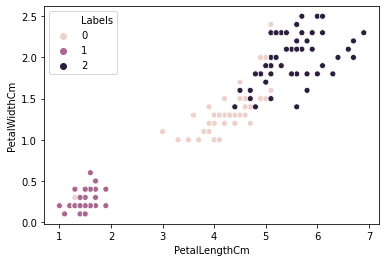

In [74]:
sns.scatterplot(x=new_data["PetalLengthCm"],y=new_data["PetalWidthCm"],hue=new_data["Labels"])

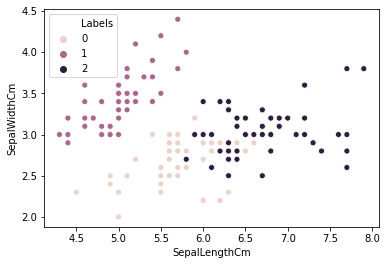

In [78]:
sns.scatterplot(x=new_data["SepalLengthCm"],y=new_data["SepalWidthCm"],hue=new_data["Labels"])

In [79]:
new_data[new_data["Labels"]==0]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Labels
41,42,4.5,2.3,1.3,0.3,Iris-setosa,0
51,52,6.4,3.2,4.5,1.5,Iris-versicolor,0
53,54,5.5,2.3,4.0,1.3,Iris-versicolor,0
54,55,6.5,2.8,4.6,1.5,Iris-versicolor,0
55,56,5.7,2.8,4.5,1.3,Iris-versicolor,0
57,58,4.9,2.4,3.3,1.0,Iris-versicolor,0
58,59,6.6,2.9,4.6,1.3,Iris-versicolor,0
59,60,5.2,2.7,3.9,1.4,Iris-versicolor,0
60,61,5.0,2.0,3.5,1.0,Iris-versicolor,0
61,62,5.9,3.0,4.2,1.5,Iris-versicolor,0


In [80]:
new_data[new_data["Labels"]==1]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
5,6,5.4,3.9,1.7,0.4,Iris-setosa,1
6,7,4.6,3.4,1.4,0.3,Iris-setosa,1
7,8,5.0,3.4,1.5,0.2,Iris-setosa,1
8,9,4.4,2.9,1.4,0.2,Iris-setosa,1
9,10,4.9,3.1,1.5,0.1,Iris-setosa,1


In [81]:
new_data[new_data["Labels"]==2]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Labels
50,51,7.0,3.2,4.7,1.4,Iris-versicolor,2
52,53,6.9,3.1,4.9,1.5,Iris-versicolor,2
56,57,6.3,3.3,4.7,1.6,Iris-versicolor,2
65,66,6.7,3.1,4.4,1.4,Iris-versicolor,2
75,76,6.6,3.0,4.4,1.4,Iris-versicolor,2
76,77,6.8,2.8,4.8,1.4,Iris-versicolor,2
77,78,6.7,3.0,5.0,1.7,Iris-versicolor,2
85,86,6.0,3.4,4.5,1.6,Iris-versicolor,2
86,87,6.7,3.1,4.7,1.5,Iris-versicolor,2
100,101,6.3,3.3,6.0,2.5,Iris-virginica,2
